In [1]:
from DeepPurpose import utils, models, dataset, property_pred
from DrugDataLoader import ADMET

RDKit WARNING: [23:32:54] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
def run_admet(config):
    X_drugs, y = ADMET.DataLoader(name = config['data_name']).get_data(format = 'DeepPurpose')
    
    train, val, test = utils.data_process(X_drug = X_drugs, y = y, drug_encoding = config['drug_encoding'],
                                split_method='random',frac=[0.7,0.1,0.2],
                                random_seed = 1234)
    
    config_model = utils.generate_config(drug_encoding = config['drug_encoding'], 
                         cls_hidden_dims = config['cls_hidden_dim'], 
                         train_epoch = config['train_epoch'], 
                         LR = config['LR'], 
                         batch_size = config['batch_size'],
                         hidden_dim_drug = config['hidden_dim_drug'],
                         mpnn_hidden_size = config['mpnn_hidden_size'],
                         mpnn_depth = config['mpnn_depth']
                        )
    
    model = property_pred.model_initialize(**config_model)
    model.train(train, val, test, verbose = True)
    model.save_model('./' + config['data_name'] + '_' + config['drug_encoding'] + '_model')

There are 12665 unique drugs
Done!


Drug Property Prediction Mode...
in total: 12665 drugs
encoding drug...
unique drugs: 12665
drug encoding finished...
Done.
Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69429. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.86095 , AUPRC: 0.82955 , F1: 0.73394
Training at Epoch 2 iteration 0 with loss 0.46242. Total time 0.00055 hours
Validation at Epoch 2 , AUROC: 0.86505 , AUPRC: 0.83919 , F1: 0.77374
Training at Epoch 3 iteration 0 with loss 0.32648. Total time 0.00138 hours
Validation at Epoch 3 , AUROC: 0.87091 , AUPRC: 0.84725 , F1: 0.76232
Training at Epoch 4 iteration 0 with loss 0.24145. Total time 0.00194 hours
Validation at Epoch 4 , AUROC: 0.86123 , AUPRC: 0.82206 , F1: 0.77326
Training at Epoch 5 iteration 0 with loss 0.12509. Total time 0.0025 hours
Validation at Epoch 5 , AUROC: 0.85193 , AUPRC: 0.80200 , F1: 0.77814
--- Go for Testing ---
Testing AUROC: 0.8819449433741091 , AUPRC: 0.8446985317402549 

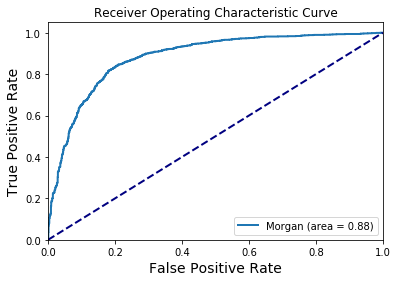

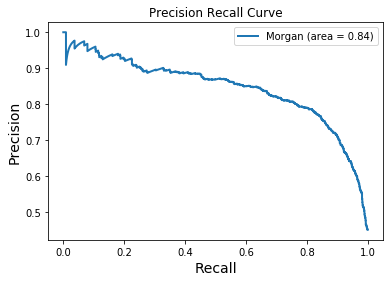

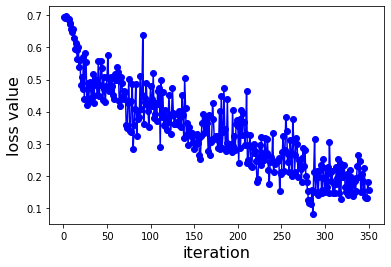

In [3]:
config = {'drug_encoding': 'Morgan',
        'data_name': 'CYP2C19',
        'cls_hidden_dim': [64],
        'train_epoch': 5,
        'LR': 0.001,
        'batch_size': 128,
        'hidden_dim_drug': 16,
        'mpnn_hidden_size': 64,
        'mpnn_depth': 3           
        }

run_admet(config)